In [3]:
import tensorflow as tf
import pandas as pd
import pickle

In [6]:
X_train = pickle.load(open("/content/drive/MyDrive/pickles/X_train.pickle","rb"))
y_train = pickle.load(open("/content/drive/MyDrive/pickles/y_train.pickle","rb"))

X_val = pickle.load(open("/content/drive/MyDrive/pickles/X_val.pickle","rb"))
y_val = pickle.load(open("/content/drive/MyDrive/pickles/y_val.pickle","rb"))

X_test = pickle.load(open("/content/drive/MyDrive/pickles/X_test.pickle","rb"))
y_test = pickle.load(open("/content/drive/MyDrive/pickles/y_test.pickle","rb"))


In [26]:
# Model
model = tf.keras.Sequential()

# Feature Extraction
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", input_shape=(128, 128, 1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Flatten
model.add(tf.keras.layers.Flatten())
# Classification
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(128, activation="relu"))
# model.add(tf.keras.layers.Dropout(0.5))

# Output Layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 64)        

In [27]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
219/219 [==============================] - 3s 9ms/step - loss: 2.1000 - accuracy: 0.2027 - val_loss: 1.7475 - val_accuracy: 0.3009
Epoch 2/50
219/219 [==============================] - 2s 8ms/step - loss: 1.7414 - accuracy: 0.3444 - val_loss: 1.4067 - val_accuracy: 0.4737
Epoch 3/50
219/219 [==============================] - 2s 8ms/step - loss: 1.4765 - accuracy: 0.4638 - val_loss: 1.1229 - val_accuracy: 0.5789
Epoch 4/50
219/219 [==============================] - 2s 8ms/step - loss: 1.2727 - accuracy: 0.5309 - val_loss: 0.9792 - val_accuracy: 0.6693
Epoch 5/50
219/219 [==============================] - 2s 8ms/step - loss: 1.1053 - accuracy: 0.6107 - val_loss: 0.8531 - val_accuracy: 0.7071
Epoch 6/50
219/219 [==============================] - 2s 8ms/step - loss: 0.9778 - accuracy: 0.6651 - val_loss: 0.8375 - val_accuracy: 0.6957
Epoch 7/50
219/219 [==============================] - 2s 8ms/step - loss: 0.8970 - accuracy: 0.7045 - val_loss: 0.6901 - val_accuracy: 0.7620
Epoch 

In [29]:
result = model.evaluate(X_test, y_test)
print(f"Loss: {result[0]} - Accuracy: {result[1]}")

28/28 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.8890
Loss: 0.6922268271446228 - Accuracy: 0.8890160322189331


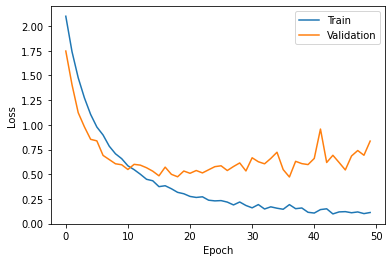

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()

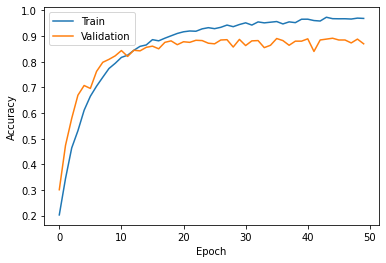

In [31]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [33]:
result_classes = ["air_conditioner","car_horn","children_playing","dog_bark","drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

In [34]:
import numpy as np

In [ ]:
result_array = model.predict(X_test[12].reshape(1,128,128,1))
result = np.argmax(result_array[0])
print(result_classes[result]) 